# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

In [121]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# Download the Dataset

In [133]:
!kaggle datasets download -d khaledzsa/spam-messages
!unzip spam-messages.zip -d data

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/spam-messages
License(s): unknown
spam-messages.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  spam-messages.zip
  inflating: data/spam.csv           


In [134]:
df= pd.read_csv('data/spam.csv', encoding='latin-1')
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's https://link2.com,spam
3,U dun say so early hor... U c already then say... https://link2.com,ham
4,"Nah I don't think he goes to usf, he lives around here though https://link1.com",ham


# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [135]:
df.head(10)

,text,label
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's https://link2.com,spam
3,U dun say so early hor... U c already then say... https://link2.com,ham
4,"Nah I don't think he goes to usf, he lives around here though https://link1.com",ham
5,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv https://link2.com",spam
6,Even my brother is not like to speak with me. They treat me like aids patent. https://link3.com,ham
7,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,ham
8,WINNER!! As a valued network customer you have been selected to receivea Ã¥Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,spam
9,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 https://link2.com,spam


In [136]:
df.sample(10)

,text,label
3217,Don know:)this week i'm going to tirunelvai da.,ham
1460,"Yalru lyfu astne chikku.. Bt innu mundhe lyf ali halla ke bilo (marriage)program edhae, so lyf is nt yet ovr chikku..ali vargu lyfu meow meow:-D",ham
2291,Remind me how to get there and I shall do so,ham
283,Okie... https://link1.com,ham
840,I luv u soo much u donÃ¥Ãt understand how special u r 2 me ring u 2morrow luv u xxx,ham
3183,Good morning pookie pie! Lol hope I didn't wake u up,ham
3575,"The sign of maturity is not when we start saying big things.. But actually it is, when we start understanding small things... *HAVE A NICE EVENING* BSLVYL",ham
130,I'm home. https://link1.com,ham
4315,"I can't speak, bcaz mobile have problem. I can listen you but you cann't listen my voice. So i calls you later. https://link1.com",ham
1021,Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on 09065394514 From Landline DATEBox1282EssexCM61XN 150p/min 18,spam


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
 1   label   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [138]:
df.shape

(5572, 2)

In [139]:
df.isnull().sum()

,0
text,0
label,0


In [140]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [141]:
max_len=pd.options.display.max_colwidth = int(df['text'].str.len().max())

In [142]:
max_len

910

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:  
###   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent. **There are NO missingg valuse**

2. **Filter by text length (Bonus)**:  
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **English stopwords loading**:  
   We load a list of English stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:  
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   
   - **Removing links (URLs)**:  
     Any URLs present in the text are removed as they are not meaningful for classification purposes.
   
   - **Removing special characters and punctuation**:  
     This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   
   - **Lowercasing**:  
     All text is converted to lowercase for uniformity and to avoid case sensitivity issues.
   
   - **Removing English stopwords**:  
     Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   
   - **Stemming or Lemmatization**:  
     Either stemming or lemmatization is applied to reduce words to their root or base form, ensuring consistency in word forms.

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [143]:
max_len=250
min_len= 10
df = df[(df['text'].str.len() <= max_len) & (df['text'].str.len() >= min_len)]

In [144]:
df.shape

(5467, 2)

In [145]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [146]:
def text_process(text):
    text = re.sub(r"http\S+", "", text)
    pun = str.maketrans('', '', string.punctuation)
    text = text.translate(pun)
    text = text.lower()
    word_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in word_tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    processed_text = ' '.join(lemmatized_text)

    return processed_text


In [147]:
df['text'] = df['text'].apply(text_process)

In [148]:
df.head(10)

,text,label
0,go jurong point crazy available bugis n great world la e buffet cine got amore wat,ham
1,ok lar joking wif u oni,ham
2,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,spam
3,u dun say early hor u c already say,ham
4,nah dont think go usf life around though,ham
5,freemsg hey darling 3 week word back id like fun still tb ok xxx std chgs send ã¥â£150 rcv,spam
6,even brother like speak treat like aid patent,ham
7,per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune,ham
8,winner valued network customer selected receivea ã¥â£900 prize reward claim call 09061701461 claim code kl341 valid 12 hour,spam
9,mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030,spam


# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [149]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

In [150]:
sequences

[[7,
  3837,
  263,
  569,
  570,
  1059,
  50,
  62,
  264,
  1060,
  85,
  2540,
  1061,
  12,
  3838,
  75],
 [10, 224, 1186, 330, 1, 1582],
 [9,
  347,
  3,
  598,
  739,
  95,
  1583,
  959,
  496,
  1584,
  1928,
  195,
  1929,
  21,
  1583,
  1585,
  225,
  347,
  2541,
  28,
  2542,
  285,
  2543],
 [1, 143, 61, 286, 2544, 1, 73, 77, 61],
 [793, 11, 40, 7, 740, 96, 139, 362],
 [683,
  58,
  1062,
  115,
  48,
  146,
  38,
  273,
  15,
  274,
  34,
  1586,
  10,
  275,
  869,
  3839,
  24,
  331,
  2545],
 [157, 451, 15, 287, 516, 15, 3840, 3841],
 [133,
  741,
  1187,
  1187,
  1587,
  1930,
  1931,
  1932,
  474,
  794,
  497,
  795,
  348,
  796,
  69,
  794],
 [541,
  634,
  288,
  130,
  310,
  2546,
  1063,
  72,
  797,
  53,
  2,
  2547,
  53,
  299,
  2548,
  392,
  599,
  158],
 [35,
  870,
  241,
  1,
  36,
  960,
  379,
  213,
  393,
  35,
  242,
  9,
  2,
  35,
  379,
  90,
  9,
  2549],
 [4, 137, 65, 30, 134, 11, 22, 180, 201, 961, 127, 106, 107, 3842, 363, 26],
 [1

In [151]:
vocab_size = 10000
pad_seq = pad_sequences(sequences, maxlen=250, padding='post')


In [152]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])

In [153]:
pad_seq

array([[   7, 3837,  263, ...,    0,    0,    0],
       [  10,  224, 1186, ...,    0,    0,    0],
       [   9,  347,    3, ...,    0,    0,    0],
       ...,
       [8518, 1362, 8519, ...,    0,    0,    0],
       [ 129, 8520, 3786, ...,    0,    0,    0],
       [2271,  409,  202, ...,    0,    0,    0]], dtype=int32)

In [160]:
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(pad_seq, y, test_size=0.20, random_state=42)


In [161]:
y

,label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [162]:
x_train.shape

(4373, 250)

In [163]:
y_train.shape

(4373,)

# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [164]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_len,)),
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [165]:
batch_size = 16

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

history = model.fit(
    train_dataset,
    epochs=7,
    validation_data=test_dataset,
)


Epoch 1/7
274/274 ━━━━━━━━━━━━━━━━━━━━ 39s 118ms/step - accuracy: 0.9018 - loss: 0.2638 - val_accuracy: 0.9771 - val_loss: 0.0718
Epoch 2/7
274/274 ━━━━━━━━━━━━━━━━━━━━ 36s 108ms/step - accuracy: 0.9915 - loss: 0.0328 - val_accuracy: 0.9753 - val_loss: 0.0738
Epoch 3/7
274/274 ━━━━━━━━━━━━━━━━━━━━ 31s 113ms/step - accuracy: 0.9986 - loss: 0.0068 - val_accuracy: 0.9762 - val_loss: 0.0922
Epoch 4/7
274/274 ━━━━━━━━━━━━━━━━━━━━ 38s 103ms/step - accuracy: 1.0000 - loss: 3.1509e-04 - val_accuracy: 0.9808 - val_loss: 0.0969
Epoch 5/7
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 1.0000 - loss: 1.2881e-04 - val_accuracy: 0.9790 - val_loss: 0.1055
Epoch 6/7
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 1.0000 - loss: 5.3899e-05 - val_accuracy: 0.9808 - val_loss: 0.1114
Epoch 7/7
274/274 ━━━━━━━━━━━━━━━━━━━━ 45s 118ms/step - accuracy: 1.0000 - loss: 3.7101e-05 - val_accuracy: 0.9808 - val_loss: 0.1162


# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

In [166]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=2)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

ValueError: Cannot take the length of shape with unknown rank.

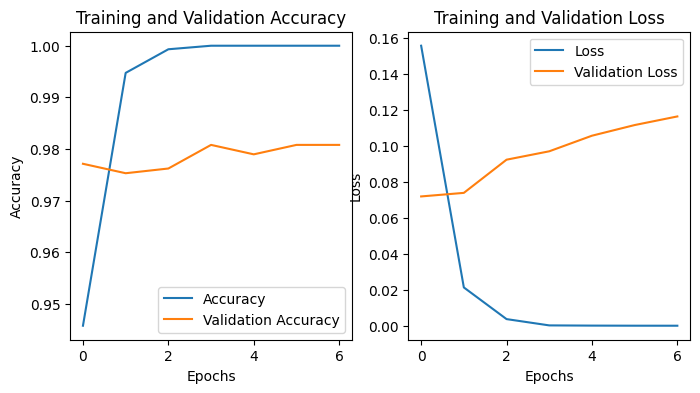

In [167]:

history_dict = history.history


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()


# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

In [169]:
sample_text = (
    '''Winning an unexpected prize sounds great, in theory. However, being notified of winning a contest you didn’t enter is a dead giveaway of a phishing text. If you’re unsure whether an offer is authentic, contact the business directly to verify.'''
)

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([sample_text])
sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=max_len, padding='post')

predictions = model.predict(sample_padded)
print(*predictions[0])

if predictions[0] < 0:
    print('The ham')
else:
    print('The spam')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0.24413532
The spam


# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here: